In [3]:
# cerate a case study for walmart sales data

# load data 
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the dataset
df = pd.read_csv('Walmart_Sales.csv')

# display the first few rows of the dataset
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [4]:
# clean the dataset
# check for missing values
print(df.isnull().sum())

Store           0
Date            1
Weekly_Sales    0
Holiday_Flag    0
Temperature     1
Fuel_Price      0
CPI             0
Unemployment    1
dtype: int64


In [5]:
# remove rows with missing values
df = df.dropna()
# check for missing values again
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [6]:
# check the data types of the columns
print(df.dtypes)

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [8]:
# convert the 'Date' column to datetime format with dayfirst=True
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
# check the data types again
print(df.dtypes)

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object


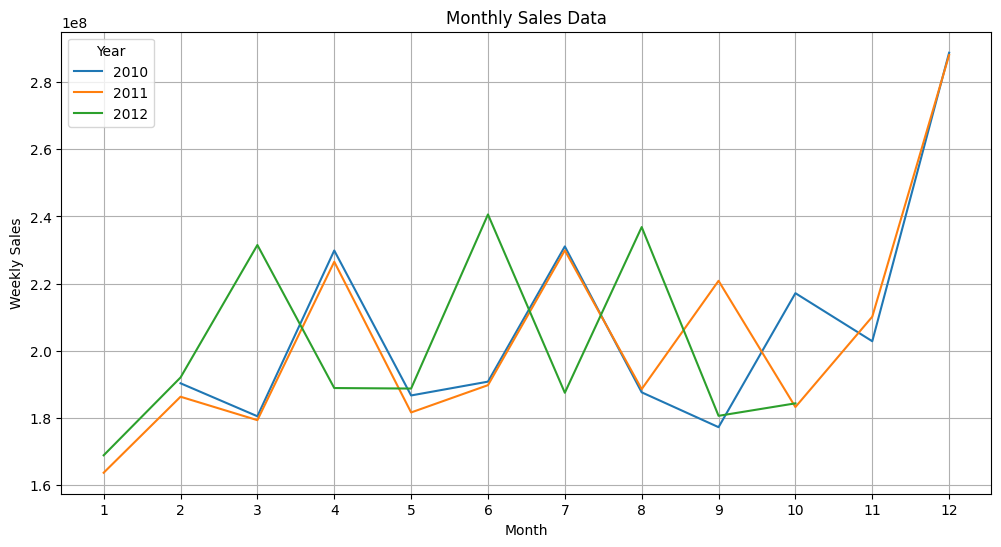

In [9]:
# plot the sales data month-wise
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
# group by month and year
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()
# plot the monthly sales data
plt.figure(figsize=(12, 6))
for year in monthly_sales['Year'].unique():
    yearly_data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Weekly_Sales'], label=str(year))
plt.title('Monthly Sales Data')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.xticks(monthly_sales['Month'].unique())
plt.legend(title='Year')
plt.grid()
plt.show()

In [10]:
# find the store with the highest sales
highest_sales_store = df.groupby('Store')['Weekly_Sales'].sum().idxmax()
print(f"The store with the highest sales is Store {highest_sales_store}.")
# find the store with the lowest sales
lowest_sales_store = df.groupby('Store')['Weekly_Sales'].sum().idxmin()
print(f"The store with the lowest sales is Store {lowest_sales_store}.")

The store with the highest sales is Store 20.
The store with the lowest sales is Store 33.


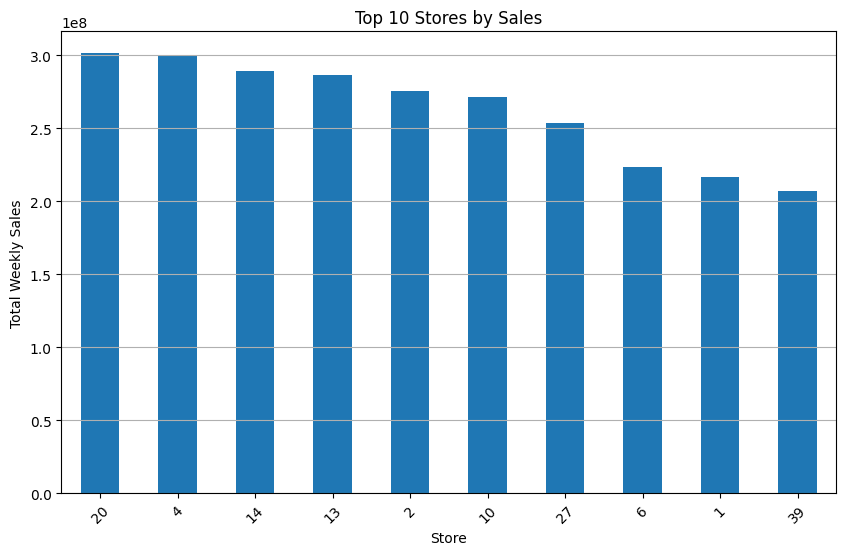

In [11]:
# create a bar plot for the top 10 stores by sales
top_stores = df.groupby('Store')['Weekly_Sales'].sum().nlargest(10)
top_stores.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Stores by Sales')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


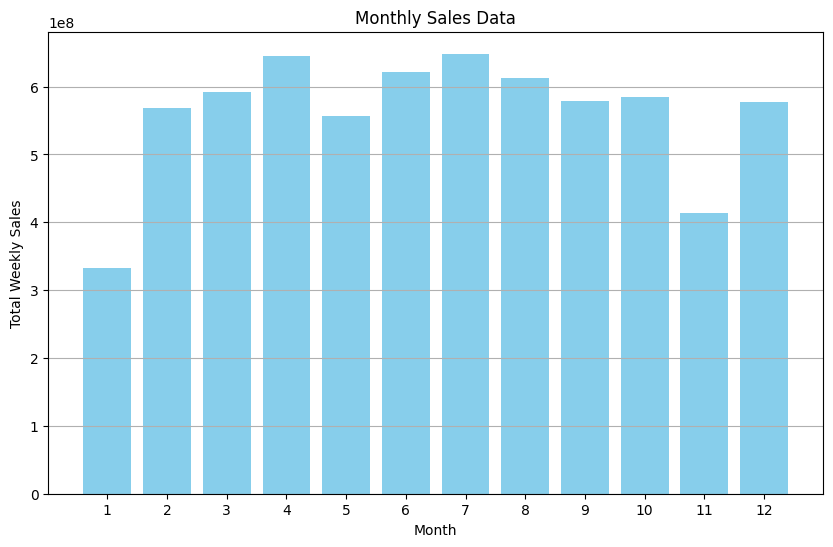

In [12]:
# cerate a bar month-wise sales data
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['Month'], monthly_sales['Weekly_Sales'], color='skyblue')
plt.title('Monthly Sales Data')
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales')
plt.xticks(monthly_sales['Month'], rotation=0)
plt.grid(axis='y')
plt.show()

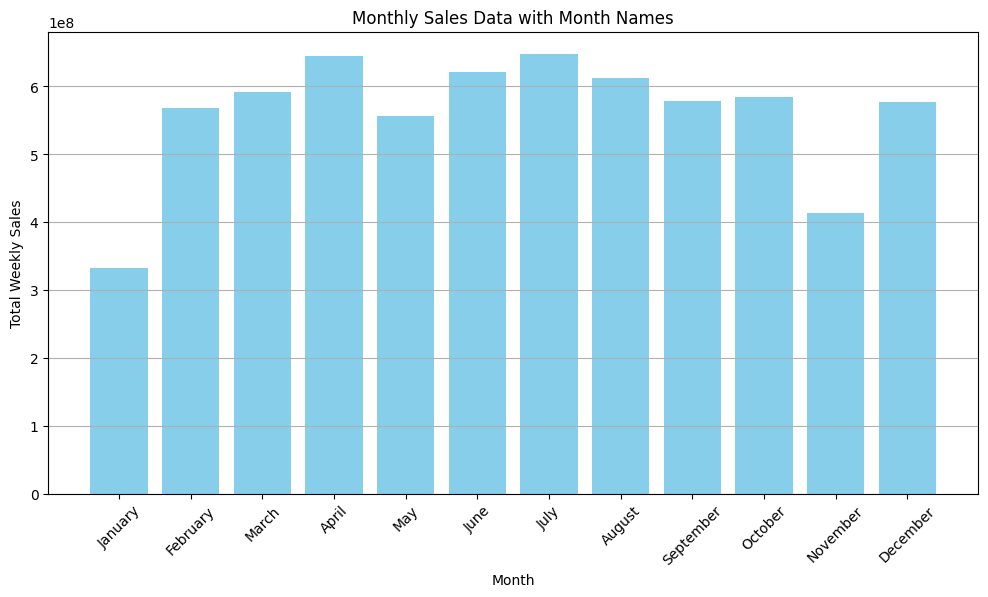

In [13]:
# add month name to the month column
monthly_sales['Month_Name'] = monthly_sales['Month'].apply(lambda x: pd.to_datetime(f'2020-{x}-01').strftime('%B'))
# plot the monthly sales data with month names
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['Month_Name'], monthly_sales['Weekly_Sales'], color='skyblue')
plt.title('Monthly Sales Data with Month Names')
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [14]:
# find the month with the highest sales
highest_sales_month = monthly_sales.loc[monthly_sales['Weekly_Sales'].idxmax()]
print(f"The month with the highest sales is {highest_sales_month['Month_Name']} with sales of {highest_sales_month['Weekly_Sales']:.2f}.")

The month with the highest sales is July with sales of 648508559.11.


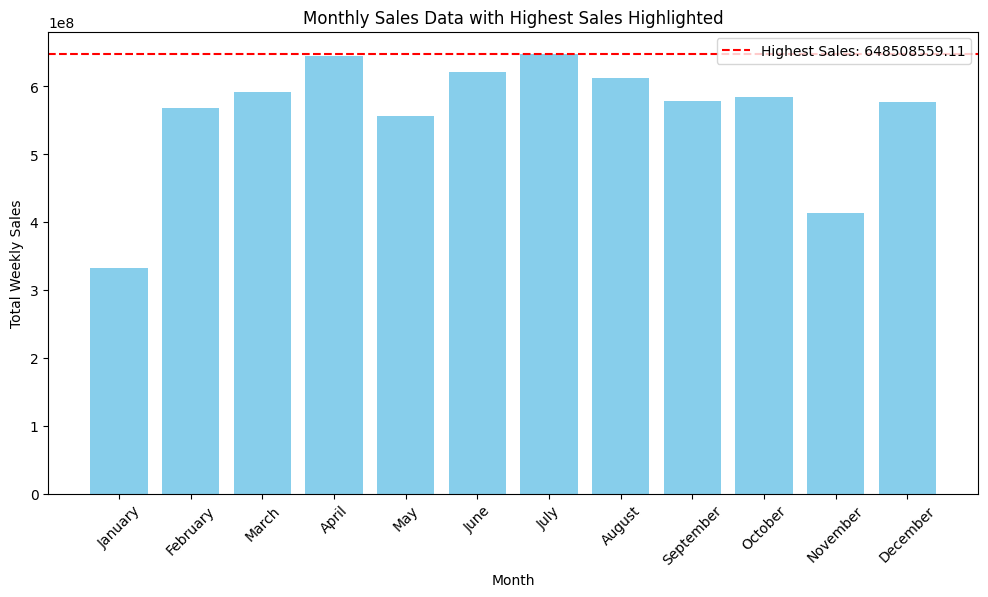

In [17]:
# show in the plot heighest sales month
highest_month = monthly_sales.loc[monthly_sales['Weekly_Sales'].idxmax()]
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['Month_Name'], monthly_sales['Weekly_Sales'], color='skyblue')
plt.axhline(y=highest_month['Weekly_Sales'], color='r', linestyle='--', label=f'Highest Sales: {highest_month["Weekly_Sales"]:.2f}')
plt.title('Monthly Sales Data with Highest Sales Highlighted')
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()


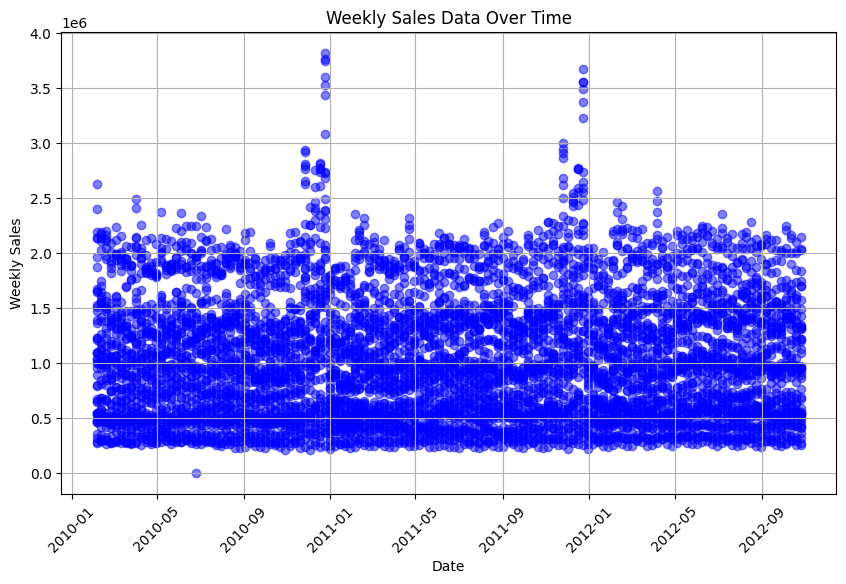

In [20]:
# scatter plot for sales data
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Weekly_Sales'], alpha=0.5, color='blue')
plt.title('Weekly Sales Data Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

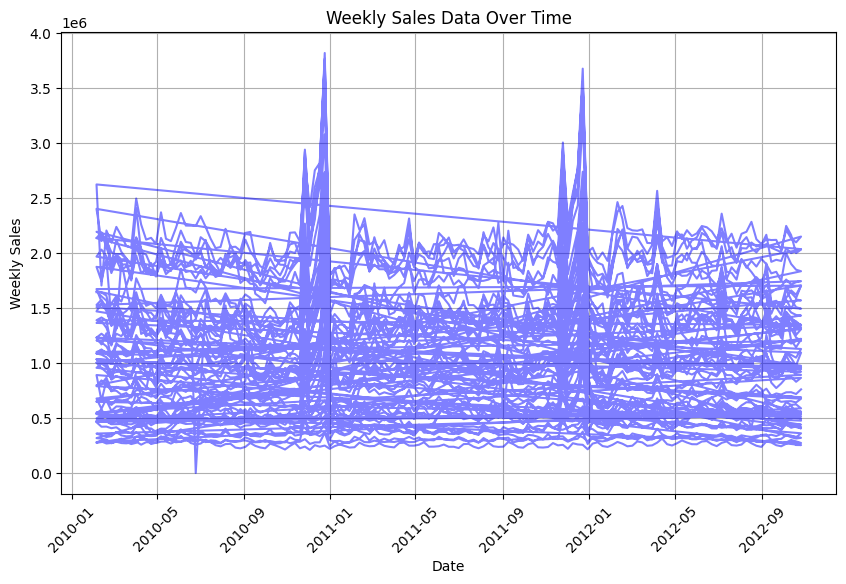

In [21]:
# line plot for sales data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Weekly_Sales'], alpha=0.5, color='blue')
plt.title('Weekly Sales Data Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [22]:
# find the mean, median, and standard deviation of weekly sales
mean_sales = df['Weekly_Sales'].mean()
median_sales = df['Weekly_Sales'].median()
std_sales = df['Weekly_Sales'].std()
print(f"Mean Weekly Sales: {mean_sales:.2f}")
print(f"Median Weekly Sales: {median_sales:.2f}")
print(f"Standard Deviation of Weekly Sales: {std_sales:.2f}")

Mean Weekly Sales: 1046541.36
Median Weekly Sales: 960365.65
Standard Deviation of Weekly Sales: 564550.46


    Store          mean       median            std
0       1  1.546699e+06  1537118.735  204606.410252
1       2  1.925751e+06  1879107.310  237683.694682
2       3  4.027044e+05   395107.350   46319.631557
3       4  2.094713e+06  2073951.380  266201.442297
4       5  3.180118e+05   310338.170   37737.965745
5       6  1.564728e+06  1524390.070  212525.855862
6       7  5.706173e+05   557166.350  112585.469220
7       8  9.087495e+05   893399.770  106280.829881
8       9  5.439806e+05   536537.640   69028.666585
9      10  1.899425e+06  1827521.710  302262.062504
10     11  1.356383e+06  1323243.350  165833.887863
11     12  1.009002e+06   981615.810  139166.871880
12     13  2.003620e+06  1958823.560  265506.995776
13     14  2.020978e+06  2004330.300  317569.949476
14     15  6.233125e+05   603318.890  120538.652043
15     16  5.192477e+05   508520.090   85769.680133
16     17  8.935814e+05   872817.620  112162.936087
17     18  1.084718e+06  1060433.100  176641.510839
18     19  1

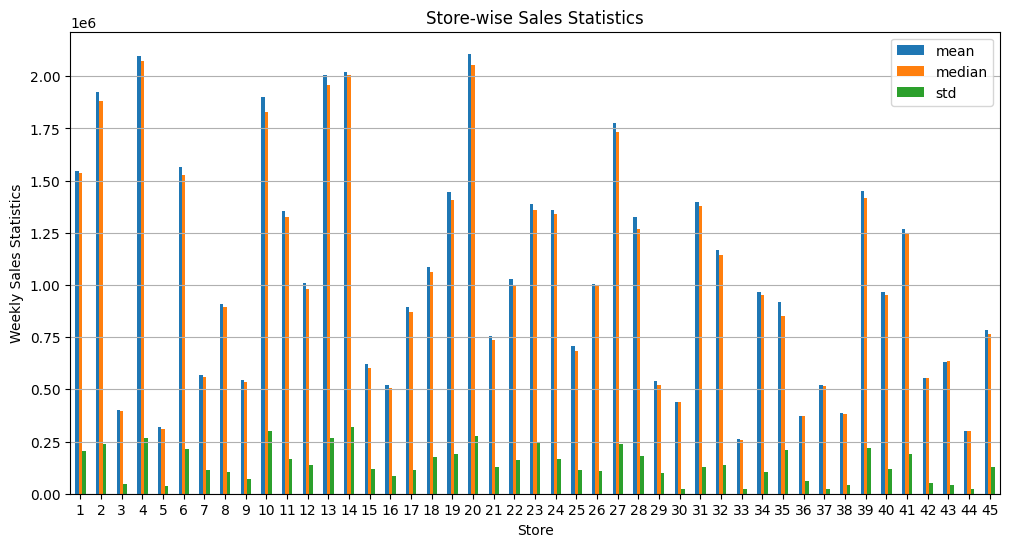

In [23]:
# store-wise sales statistics
store_sales_stats = df.groupby('Store')['Weekly_Sales'].agg(['mean', 'median', 'std']).reset_index()
print(store_sales_stats)
# plot store-wise sales statistics
store_sales_stats.plot(x='Store', kind='bar', figsize=(12, 6))
plt.title('Store-wise Sales Statistics')
plt.xlabel('Store')
plt.ylabel('Weekly Sales Statistics')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
